Step 1: Importig Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Creating Dataframe

In [13]:
data = pd.read_csv("D:\Projects\Zomato Data Analysis\Zomato data .csv")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\hp\AppData\Local\Temp\ipykernel_2724\346453195.py:1: SyntaxWarning: invalid escape sequence '\P'
  data = pd.read_csv("D:\Projects\Zomato Data Analysis\Zomato data .csv")


In [14]:
print(data)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [15]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Step 3:Data Preprocessing

In [16]:
def convertRate(value):
    value = str(value).split('/')
    value = value[0]

    return float(value)

data['rate'] = data['rate'].apply(convertRate)

In [17]:
data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


1.What type of resaurant do majority customers order from?

Text(0.5, 0, 'Type of Restaurant')

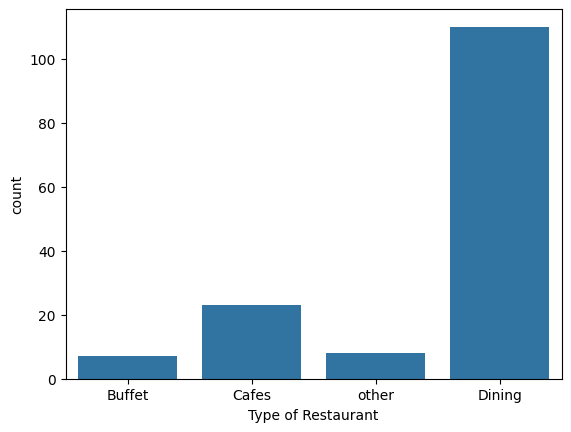

In [25]:
sns.countplot(x=data['listed_in(type)'])
plt.xlabel("Type of Restaurant")

In [29]:
max_value = data['listed_in(type)'].value_counts().max()
max_type = data['listed_in(type)'].value_counts().idxmax()

Conclusion

In [30]:
print(f"{max_type} has highest orders: {max_value}")

Dining has highest orders: 110


2. How many votes has each type of restaurant received from customers?

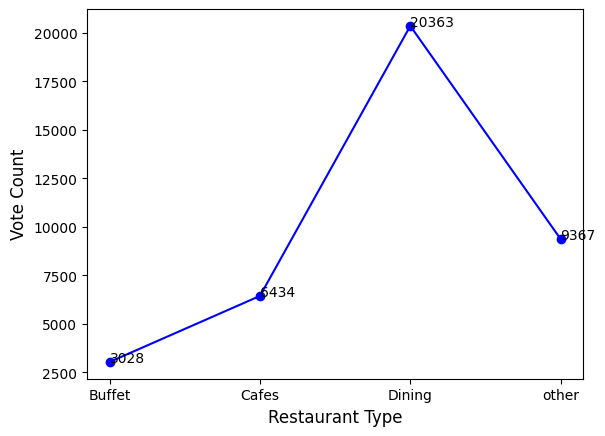

In [49]:
grouped_data = data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

plt.plot(result, c = "blue", marker = "o")

for i, v in enumerate(result['votes']):
    plt.text(i, v, str(v), color='black', ha='left')

plt.xlabel("Restaurant Type", color="black", size=12)
plt.ylabel("Vote Count", color="black", size=12)

plt.show()

Conclusion:   Buffet - 3028;
Cafes - 6434;
Dining - 20363;
Other - 9367

3. What are the Ratings that Majority Restaurants have received?

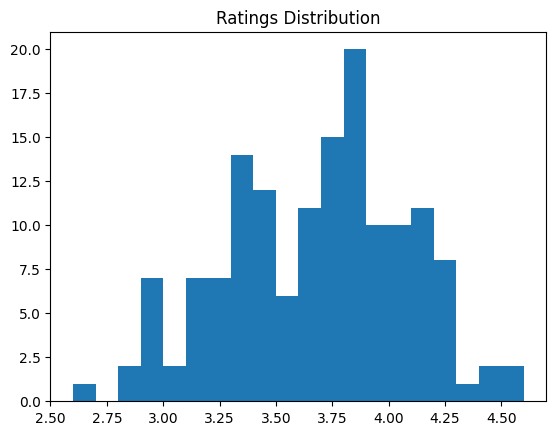

In [38]:
plt.hist(data["rate"], bins = 20)
plt.title("Ratings Distribution")
plt.show()

Conclusion: Average ratings that majority restaurants have received = 3.8

4. Average spending on each order

Text(0.5, 0, 'Amount Spent')

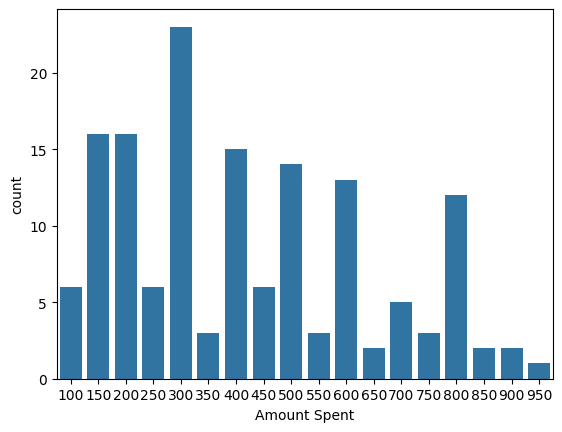

In [44]:
sns.countplot(x=data['approx_cost(for two people)'])
plt.xlabel("Amount Spent")

Conclusion: Average spending on orders = 300

5. Which mode received more rating?

<Axes: xlabel='online_order', ylabel='rate'>

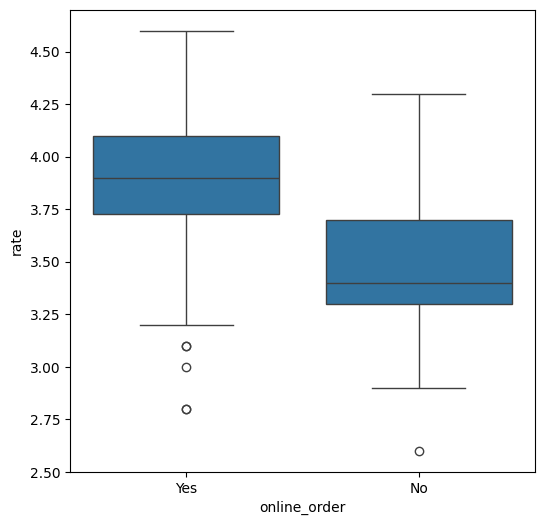

In [51]:
plt.figure(figsize = (6,6))
sns.boxplot(x = "online_order", y = "rate", data = data)

Conclusion: Online mode receives higher ratings

6. Which type of restaurant received more offline orders?

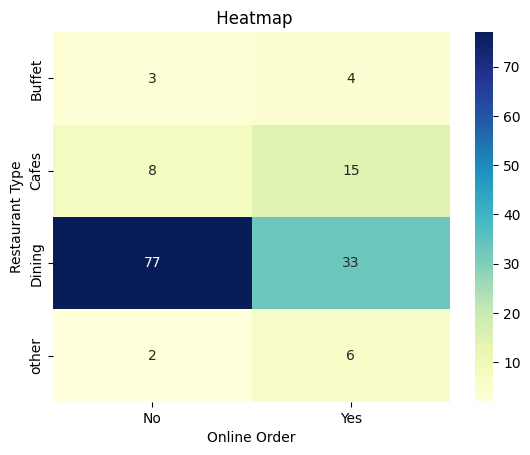

In [55]:
pivot_table = data.pivot_table(index = "listed_in(type)", columns = "online_order", aggfunc = "size", fill_value=0)
sns.heatmap(pivot_table, annot = True, cmap = "YlGnBu", fmt = "d")
plt.title(" Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Restaurant Type")
plt.show()

Conclusion: Dining type of retaurants received more offline orders